### Центральная предельная теорема своими руками

Для поверки ЦПТ я выбрал распределение Рэлея.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

from collections import defaultdict
from scipy.stats import rayleigh, norm

Мода равна среднеквадратическому отклонению $\sigma$. Далее везде по умолчанию это <code>2</code>.  
Мат.ожидание / среднее: $\Bbb{E}[X] = \sigma \sqrt{\frac{\pi}{2}}$  
Дисперсия: $D[X] = \Big(2 - {\frac{\pi}{2}}\Big)\sigma^{2}$

In [2]:
σ = 2
π = math.pi

rl_mean = σ * math.sqrt(π/2)
rl_variance = (2 - π/2) * σ**2

print(f"Мат.ожидание: {rl_mean}\nДисперсия: {rl_variance}")

Мат.ожидание: 2.5066282746310002
Дисперсия: 1.7168146928204138


---

Построим график распределения Рэлея (выборка размера 1000) и его теоретической плотности:

In [3]:
rv = rayleigh(scale=σ)
rvs = rv.rvs(size=1000)

x = np.linspace(rayleigh.ppf(0.01, scale=σ), rayleigh.ppf(0.99, scale=σ), 1000)
pdf = rv.pdf(x)

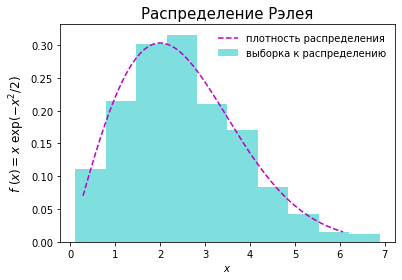

In [4]:
# просто примарафеченная гистограмма
fig, ax = plt.subplots(1, 1)
ax.hist(rvs, density=True, color="c", alpha=0.5, label="выборка к распределению")
ax.plot(x, pdf, "m--", label="плотность распределения")
ax.legend(frameon=False)
ax.set_xlabel("$x$")
ax.set_ylabel("$f\ (x)=x\ \exp (-x^2/2)$", size=12)
ax.set_title("Распределение Рэлея", size=15)
plt.show()

---

Оценка распределения выборочного среднего при разных объёмах выборок — 5, 10, 50:

In [5]:
# генерирую выборку длины n и кладу среднее значение выборки
# в список внутри словаря, где ключ — n
mu = defaultdict(list)
SAMPLES = [5, 10, 50]

for n in SAMPLES:
    for j in range(1000):
        rvs = np.random.rayleigh(size=n, scale=σ)
        mu[n].append(rvs.mean())

In [6]:
# посчитать среднеквадратическое отклонения нормальных распределений
gaus_sigma = [math.sqrt(rl_variance/n) for n in SAMPLES]
# округлить до сотых
gaus_sigma = map(lambda x: round(x, 2), gaus_sigma)
gaus_sigma = list(gaus_sigma)

In [7]:
# посчитать плотность нормальных распределений
norm_rv = []
norm_x = np.linspace(0, 5, 100)
norm_pdf = []

for i in range(len(SAMPLES)):
    norm_rv.append(norm(rl_mean, gaus_sigma[i]))
    norm_pdf.append(norm_rv[i].pdf(norm_x))

---

Гистограммы распределений их выборочных средних:

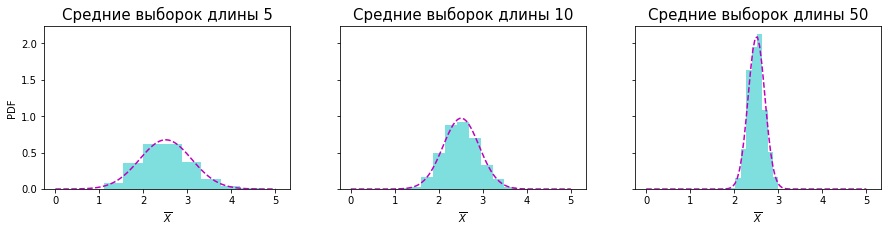

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(15, 3))

# гистограммы средних выборок
ax1.hist(mu[5], density=True, color="c", alpha=0.5)
ax2.hist(mu[10], density=True, color="c", alpha=0.5)
ax3.hist(mu[50], density=True, color="c", alpha=0.5)
ax1.set_title('Средние выборок длины 5', size=15)
ax1.set_xlabel("$\overline{X}$"); ax1.set_ylabel("PDF")
ax2.set_title('Средние выборок длины 10', size=15)
ax2.set_xlabel("$\overline{X}$")
ax3.set_title('Средние выборок длины 50', size=15)
ax3.set_xlabel("$\overline{X}$")

# плотность распределения
ax1.plot(norm_x, norm_pdf[0], "m--")
ax2.plot(norm_x, norm_pdf[1], "m--")
ax3.plot(norm_x, norm_pdf[2], "m--")

plt.show()

Среднеквадратические отклонения нормальных распределений  $\;\overline\sigma_n\;$:

In [9]:
for i in range(len(SAMPLES)):
    print(f"для n={SAMPLES[i]} sd={gaus_sigma[i]}")

для n=5 sd=0.59
для n=10 sd=0.41
для n=50 sd=0.19


С увеличением величины выборки «шляпа» нормального распределения ожидаемо становится уже и выше — сокращается рассеяние случайной величины.